In [1]:
#Task 1 : Load Data / Data Exploration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/kaleko/CourseraML/master/ex2/data/ex2data1.txt"

# Load the data (it’s comma-separated, no header)
df = pd.read_csv(url, header=None)

# Preview the data
print(df.head()) #see first few rows
print(df.shape)


           0          1  2
0  34.623660  78.024693  0
1  30.286711  43.894998  0
2  35.847409  72.902198  0
3  60.182599  86.308552  1
4  79.032736  75.344376  1
(100, 3)


Admitted
1    60
0    40
Name: count, dtype: int64
Admitted
Admitted        60
Not Admitted    40
Name: count, dtype: int64


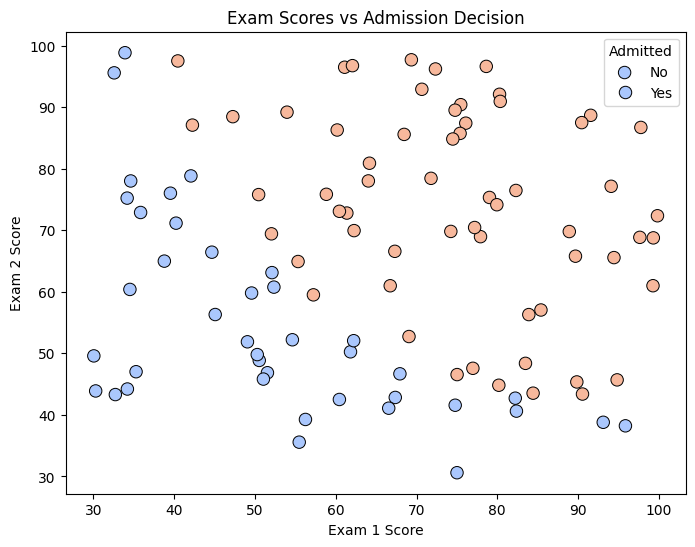

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#name columns, map them

df.columns = ['Exam 1', 'Exam 2', 'Admitted']
print(df['Admitted'].value_counts()) #0: Not Admitted; 1: Admitted

admitted_map = {0: 'Not Admitted', 1: 'Admitted'}
print(df['Admitted'].value_counts().rename(index=admitted_map)) #renamed for ease

# create scatter plot

import matplotlib.pyplot as plt


# Scatter plot for actual data
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Exam 1',
    y='Exam 2',
    hue='Admitted',             # color by admission status (0 or 1)
    palette='coolwarm',         # red/blue color scheme
    s=80,
    edgecolor='k'
)

plt.title("Exam Scores vs Admission Decision")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(title="Admitted", labels=["No", "Yes"])
plt.show()

In [10]:
#Task 2 - Logistic Regression

from sklearn.model_selection import train_test_split

y = df['Admitted'] #target features
X = df.drop(columns=['Admitted'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
) #train




In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train.values.ravel())

pred = model.predict(X_test) #train model on the data set and make predictions

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate the accuracy of your model.
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

#correctly predicts 95% of time whether student will be admitted.
#performs well and reliable as Precision and recall are both high. Exam scores are a strong predictor for admission within this data set.

Accuracy: 0.95
Confusion Matrix:
 [[ 8  0]
 [ 1 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

